### Importamos variables

In [1]:
### Manipulación de Datos
import pandas as pd
import numpy as np

### Visualización de Datos
import seaborn as sns
import matplotlib.pyplot as plt

### Tratamiento de datos
from utils.funciones import CategoricalAnalysis, extended_describe

### Importamos datos    

In [2]:
df = pd.read_csv(r"data\raw\Payment_Info.csv")
df.head()

,customer_id,contract,paperless_billing,payment_method,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,0002-ORFBO,One Year,Yes,Mailed check,65.6,42.39,593.30,0.00,0,381.51,974.81
1,0003-MKNFE,Month-to-Month,No,Mailed check,59.9,10.69,542.40,38.33,10,96.21,610.28
2,0004-TLHLJ,Month-to-Month,Yes,Electronic check,73.9,33.65,280.85,0.00,0,134.60,415.45
3,0011-IGKFF,Month-to-Month,Yes,Electronic check,98.0,27.82,1237.85,0.00,0,361.66,1599.51
4,0013-EXCHZ,Month-to-Month,Yes,Mailed check,83.9,7.38,267.40,0.00,0,22.14,289.54


|Column Name |	Description| 
|--------------|----------|
|CustomerID|	A unique ID that identifies each customer.|
|Contract|	Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year|
|Paperless Billing|	Indicates if the customer has chosen paperless billing: Yes, No|
|Payment Method|	Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check|
|Monthly Charge|	Indicates the customer’s current total monthly charge for all their services from the company|
|Total Charges|	Indicates the customer's total charges calculated to date|
|Total Refunds|	Indicates total refunds given to date|
|Total Extra Data Charges|	Indicates total charges for extra data downloads above those specified in their plan|
|Total Long Distance Charges|	Indicates total charges for long distance above those specified in their plan|

In [3]:
print(f'La base de datos a analizar posee {df.shape[0]} filas y {df.shape[1]} columnas')
print(f'\nLas features que tenemos son: {list(df.columns)}')

La base de datos a analizar posee 7043 filas y 11 columnas

Las features que tenemos son: ['customer_id', 'contract', 'paperless_billing', 'payment_method', 'monthly_ charges', 'avg_monthly_long_distance_charges', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue']


### Primera exploración

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   contract                           7043 non-null   object 
 2   paperless_billing                  7043 non-null   object 
 3   payment_method                     7043 non-null   object 
 4   monthly_ charges                   7043 non-null   float64
 5   avg_monthly_long_distance_charges  7043 non-null   float64
 6   total_charges                      7043 non-null   float64
 7   total_refunds                      7043 non-null   float64
 8   total_extra_data_charges           7043 non-null   int64  
 9   total_long_distance_charges        7043 non-null   float64
 10  total_revenue                      7043 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 605.4+ 

In [5]:
df.describe()

,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,22.958954,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,30.090047,15.448113,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,18.250000,0.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,35.500000,9.210000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,70.350000,22.890000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,89.850000,36.395000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,118.750000,49.990000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [6]:
df.describe(include="object")

,customer_id,contract,paperless_billing,payment_method
count,7043,7043,7043,7043
unique,7043,3,2,4
top,9995-HOTOH,Month-to-Month,Yes,Electronic check
freq,1,3610,4171,2365


In [7]:
df['payment_method'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [8]:
df.isna().sum()

customer_id                          0
contract                             0
paperless_billing                    0
payment_method                       0
monthly_ charges                     0
avg_monthly_long_distance_charges    0
total_charges                        0
total_refunds                        0
total_extra_data_charges             0
total_long_distance_charges          0
total_revenue                        0
dtype: int64

In [9]:
df[df.duplicated()]

,customer_id,contract,paperless_billing,payment_method,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue


In [10]:
df.rename(columns={'monthly_ charges' : 'monthly_charges'}, inplace=True)

- La mayoria de nuestros usuarios utiliza fibra óptica como servicio de internet.
- Al tener un customer_id unico para cada, no poseemos duplicados

>- **1. Avg Monthly Long Distance Charges**
- **Descripción:** Representa el promedio mensual de cargos por llamadas de larga distancia para el cliente.

- **Detalles de los datos:**
  - **Media (mean):** 22.96. En promedio, los clientes pagan alrededor de 22.96 por mes en cargos de larga distancia.
  - **Mínimo (min):** 0.00. Algunos clientes no incurren en cargos de larga distancia.
  - **Máximo (max):** 49.99. El cliente con el mayor gasto mensual de larga distancia paga 49.99.
  - **Mediana (50%):** 22.89. Esto sugiere que aproximadamente la mitad de los clientes pagan menos de 22.89 al mes.
  - **Percentil 25% (25%):** 9.21. Una cuarta parte de los clientes tienen cargos menores a 9.21.
  - **Percentil 75% (75%):** 36.39. Una cuarta parte de los clientes tienen cargos mayores a 36.39.

>- **2. Total Revenue**
- **Descripción:** Total de ingresos generados por cada cliente hasta la fecha. Se calcula como la suma de:
  - **Total Charges**: Pagos acumulados por los servicios contratados.
  - **Total Extra Data Charges**: Cargos adicionales por exceder el límite de datos.
  - **Total Long Distance Charges**: Cargos adicionales por llamadas de larga distancia.

- **Detalles de los datos:**
  - **Media (mean):** 3034.38. En promedio, cada cliente ha generado 3034.38 en ingresos totales.
  - **Mínimo (min):** 21.36. El cliente con menos ingresos generados pagó 21.36 en total.
  - **Máximo (max):** 11979.34. El cliente con más ingresos generados pagó 11,979.34 en total.
  - **Mediana (50%):** 2108.64. La mitad de los clientes ha generado menos de 2108.64.
  - **Percentil 25% (25%):** 605.61. Una cuarta parte de los clientes ha generado menos de 605.61 en ingresos totales.
  - **Percentil 75% (75%):** 4801.14. Una cuarta parte de los clientes ha generado más de 4801.14 en ingresos totales.


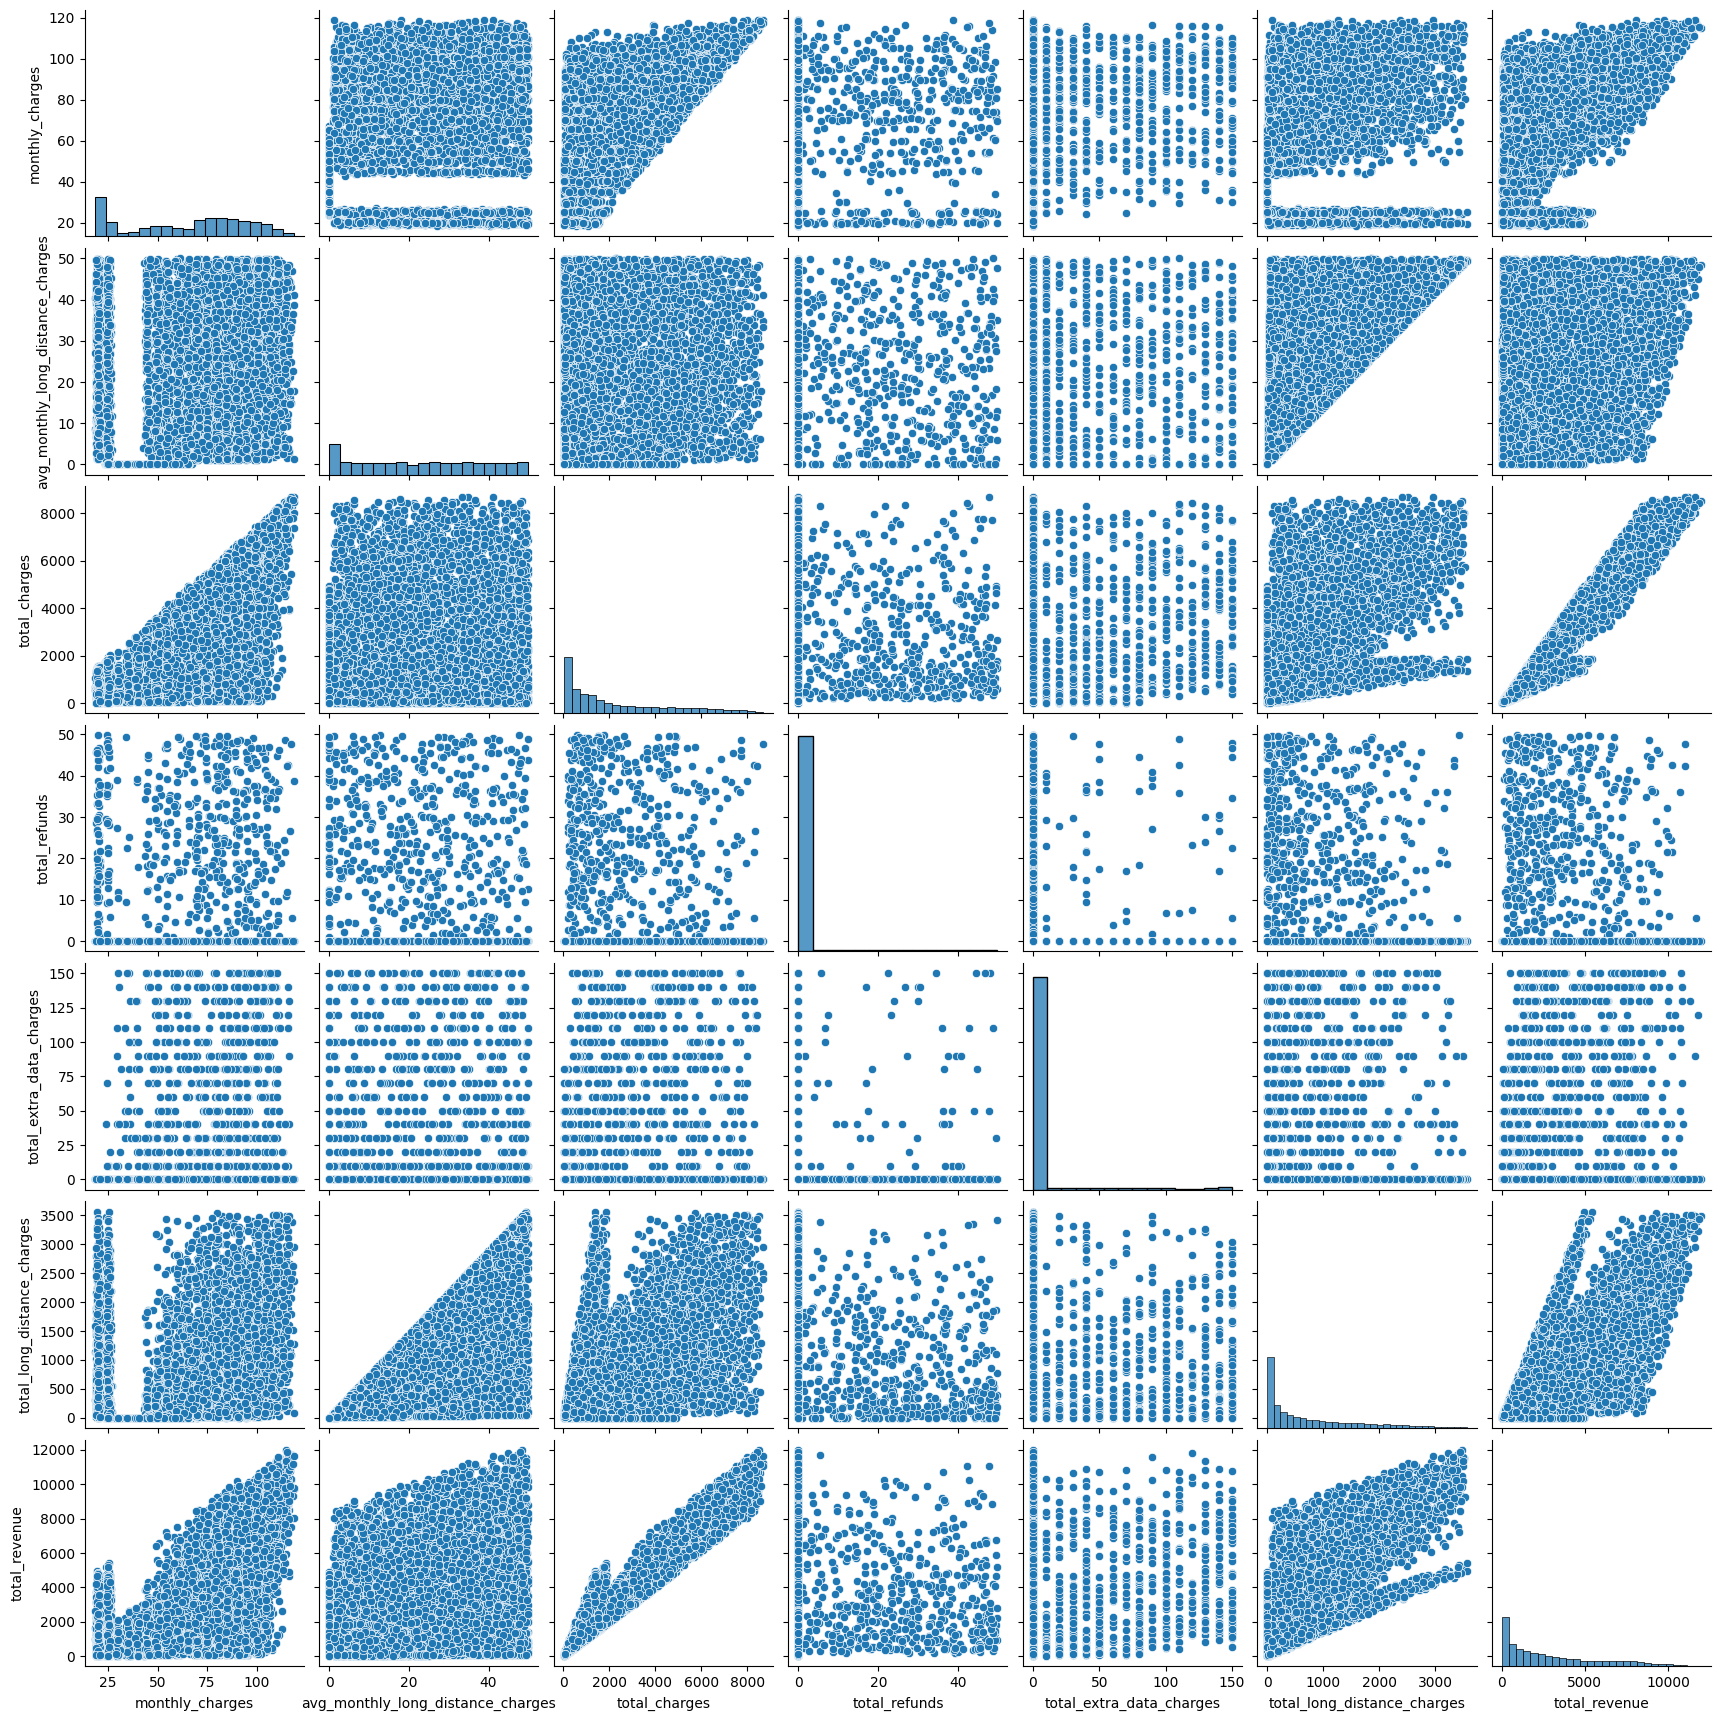

In [29]:
sns.pairplot(df)
plt.show()

In [11]:
df.to_csv(path_or_buf=r'data\clean\payment_method_clean.csv',index=False)

### Análisis exploratorio

#### Análisis univariante

In [12]:
df = pd.read_csv(r"data\clean\payment_method_clean.csv")
df.head()

,customer_id,contract,paperless_billing,payment_method,monthly_charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,0002-ORFBO,One Year,Yes,Mailed check,65.6,42.39,593.30,0.00,0,381.51,974.81
1,0003-MKNFE,Month-to-Month,No,Mailed check,59.9,10.69,542.40,38.33,10,96.21,610.28
2,0004-TLHLJ,Month-to-Month,Yes,Electronic check,73.9,33.65,280.85,0.00,0,134.60,415.45
3,0011-IGKFF,Month-to-Month,Yes,Electronic check,98.0,27.82,1237.85,0.00,0,361.66,1599.51
4,0013-EXCHZ,Month-to-Month,Yes,Mailed check,83.9,7.38,267.40,0.00,0,22.14,289.54


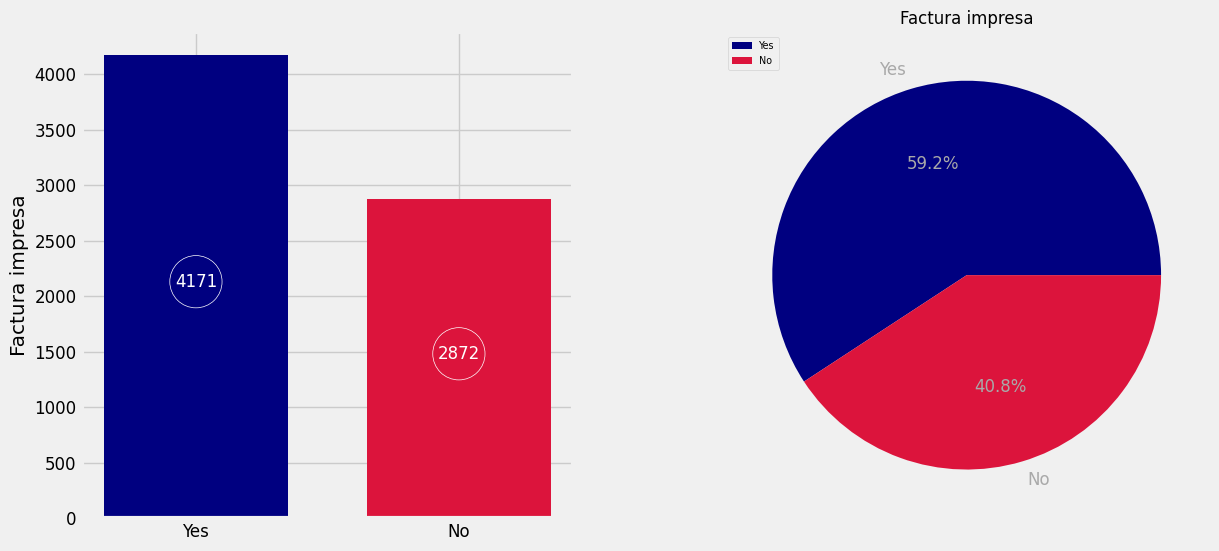

In [13]:
categorical_analyzer = CategoricalAnalysis(df=df)
categorical_analyzer.plot_top_categories(title='Factura impresa', labely='Factura impresa', column_name='paperless_billing')

- Nuestros usuarios prefieren factura impresa que electrónica con un 59,2% del total

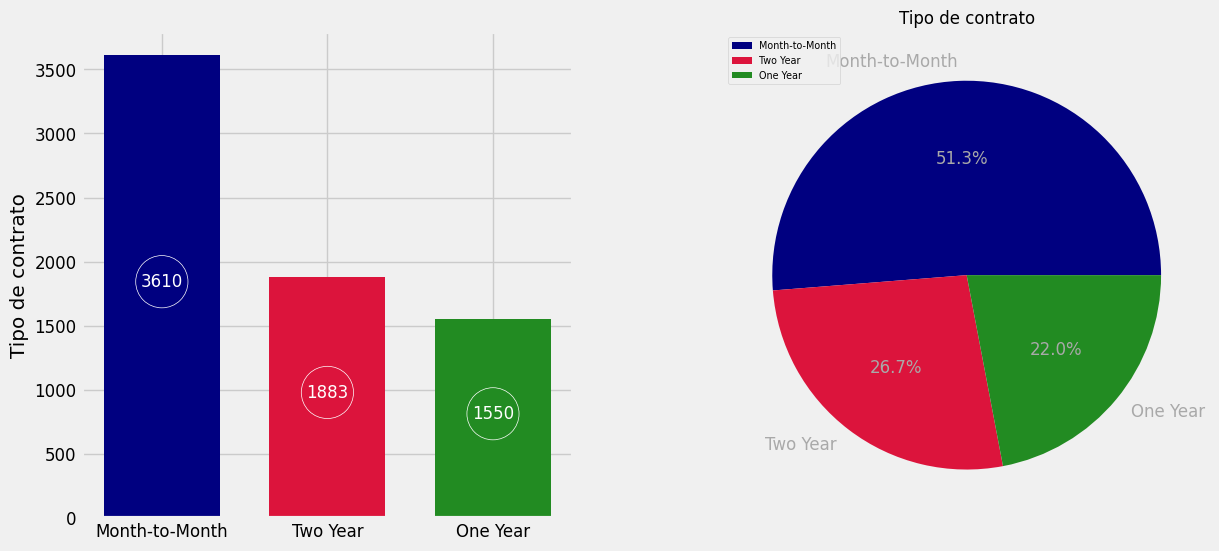

In [15]:
categorical_analyzer.plot_top_categories(title='Tipo de contrato', labely='Tipo de contrato', column_name='contract')

- Con un 51,3% nuestros usuarios solo se encuentran atados en un contrato de mes a mes.

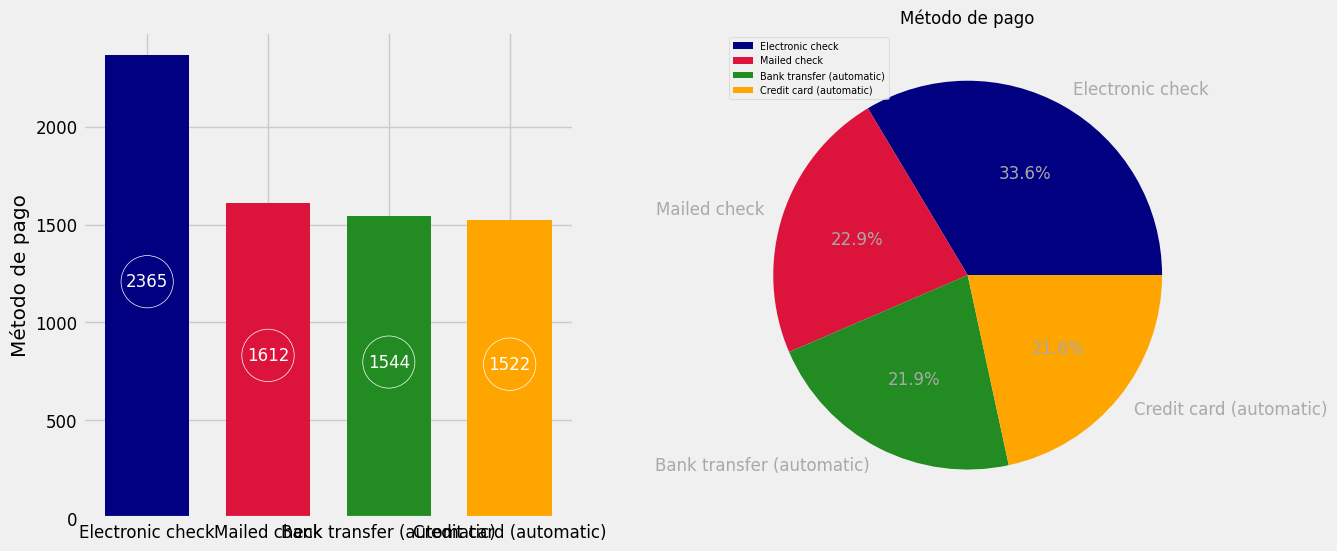

In [16]:
categorical_analyzer.plot_top_categories(title='Método de pago', labely='Método de pago', column_name='payment_method')

- El método de pago más popular es el electrónico con un 33,6% seguido del pago en cheque vía mail.

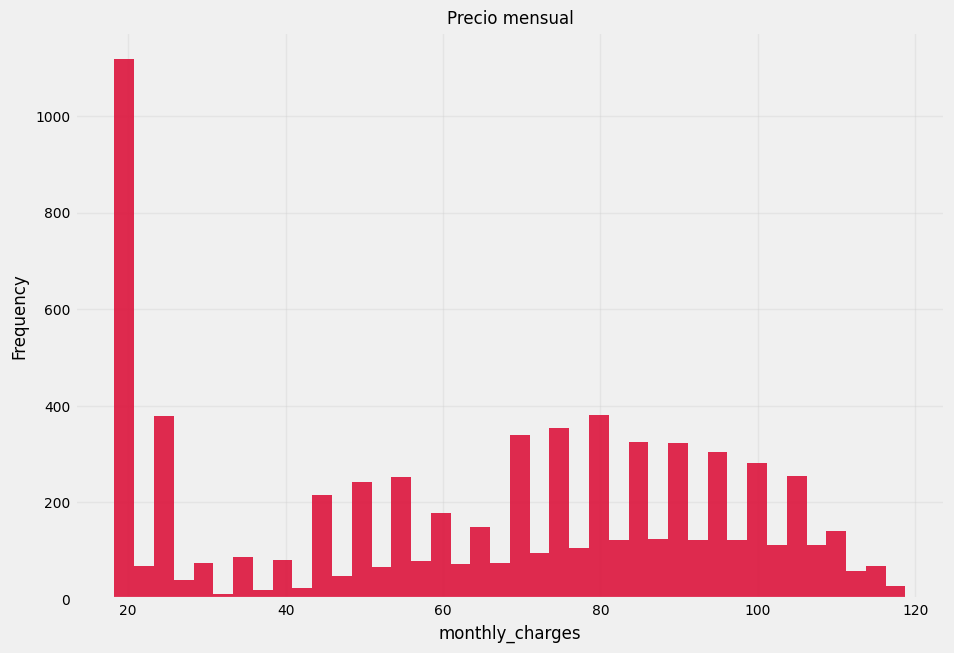

La distribución es platicúrtica con una curtosis de -1.26. Los datos se encuentran dispersos.
La distribución se encuentra sesgada hacia la derecha -0.22.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
monthly_charges,7043.0,64.761692,70.35,20.05,30.09,18.25,35.5,70.35,89.85,118.75,-1.26,-0.22


In [16]:
categorical_analyzer.plot_distribution(title= 'Precio mensual', column_name='monthly_charges', cant_bins = 40, color='crimson', rotation=0, alpha=0.9)

- Los precios mensuales varían entre 18 y 118 dólares, donde la mitad de nuestros usuarios pagan menos de 70 u/o más conteniendo una moda de 20 dólares.

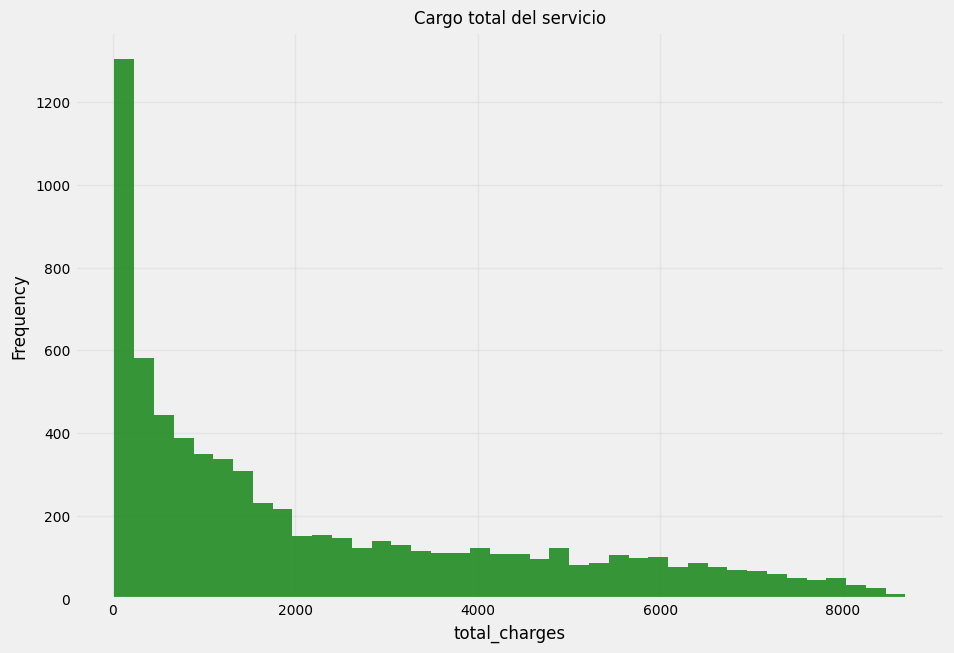

La distribución es platicúrtica con una curtosis de -0.23. Los datos se encuentran dispersos.
La distribución se encuentra sesgada hacia la izquierda 0.96.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
total_charges,7043.0,2280.381264,1394.55,20.2,2266.22,18.8,400.15,1394.55,3786.6,8684.8,-0.23,0.96


In [20]:
categorical_analyzer.plot_distribution(title= 'Cargo total del servicio', column_name='total_charges', cant_bins = 40, color='forestgreen', rotation=0, alpha=0.9)

- Es la suma total del cargo pagado hasta la fecha. Obtenemos desde 18 a 8649 dólares apróximadamente.

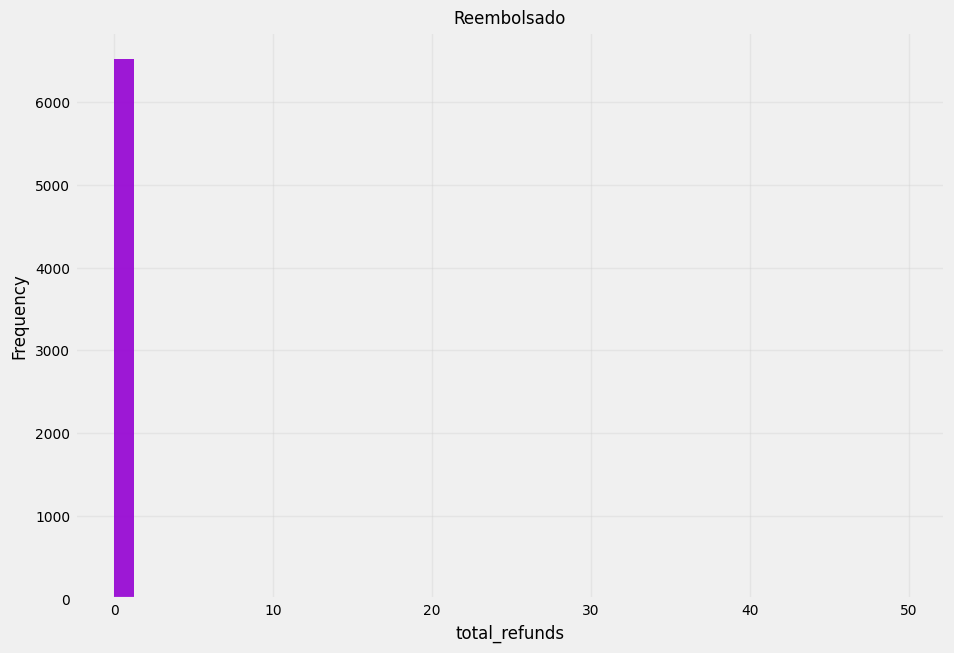

La distribución es leptocúrtica con una curtosis de 18.34. Los datos se encuentran concentrados alrededor de la media.
La distribución se encuentra sesgada hacia la izquierda 4.33.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
total_refunds,7043.0,1.962182,0.0,0.0,7.9,0.0,0.0,0.0,0.0,49.79,18.34,4.33


In [19]:
categorical_analyzer.plot_distribution(title= 'Reembolsado', column_name='total_refunds', cant_bins = 40, color='darkviolet', rotation=0, alpha=0.9)

- Obtenemos tan solo un reembolso de 50 dólares dentro de nuestros usuarios.

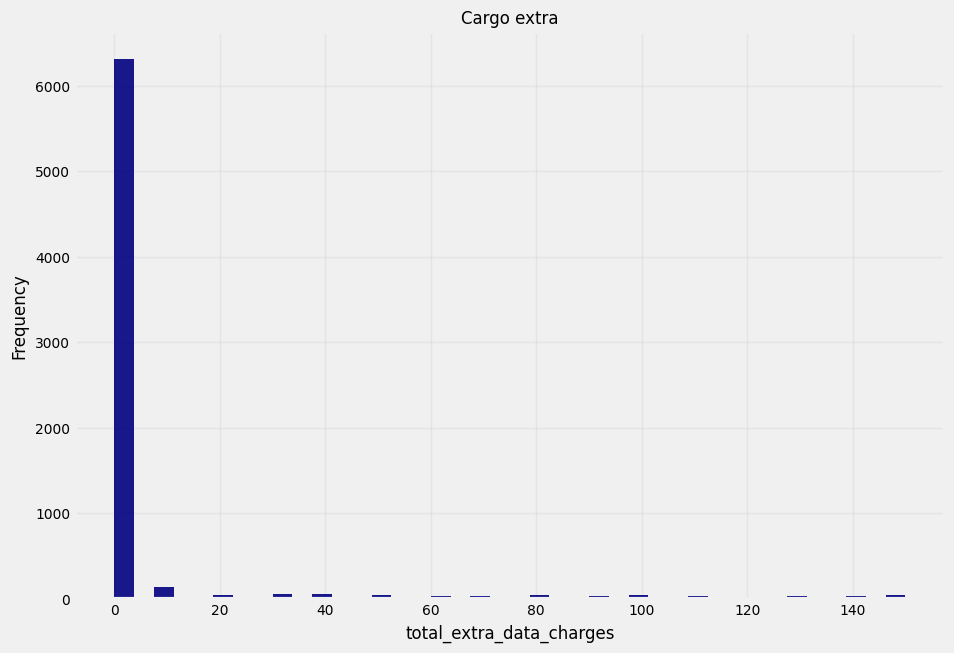

La distribución es leptocúrtica con una curtosis de 16.45. Los datos se encuentran concentrados alrededor de la media.
La distribución se encuentra sesgada hacia la izquierda 4.09.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
total_extra_data_charges,7043.0,6.860713,0.0,0,25.1,0.0,0.0,0.0,0.0,150.0,16.45,4.09


In [23]:
categorical_analyzer.plot_distribution(title= 'Cargo extra', column_name='total_extra_data_charges', cant_bins = 40, color='navy', rotation=0, alpha=0.9)

- L agran mayoría de nuetros uusuarios no superan los límites de nuestros planes.

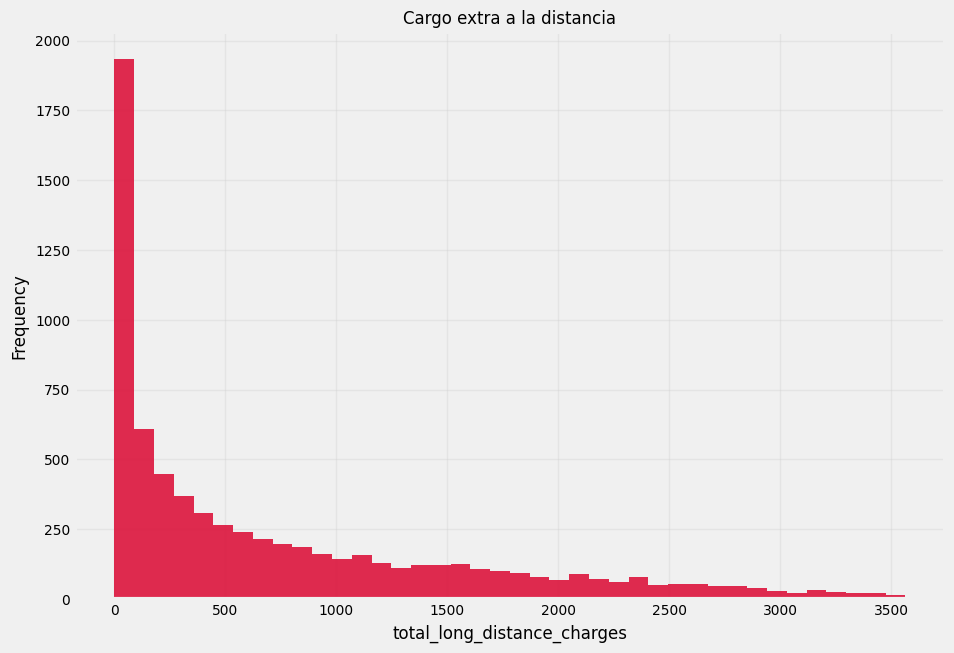

La distribución es leptocúrtica con una curtosis de 0.64. Los datos se encuentran concentrados alrededor de la media.
La distribución se encuentra sesgada hacia la izquierda 1.24.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
total_long_distance_charges,7043.0,749.099262,401.44,0.0,846.66,0.0,70.545,401.44,1191.1,3564.72,0.64,1.24


In [24]:
categorical_analyzer.plot_distribution(title= 'Cargo extra a la distancia', column_name='total_long_distance_charges', cant_bins = 40, color='crimson', rotation=0, alpha=0.9)

- **Descripción**: Representa el promedio mensual de cargos por llamadas de larga distancia para el cliente.

- Dentro de un rango de 70 a 1191 dólares es la carga del mismo a nivel promedio.

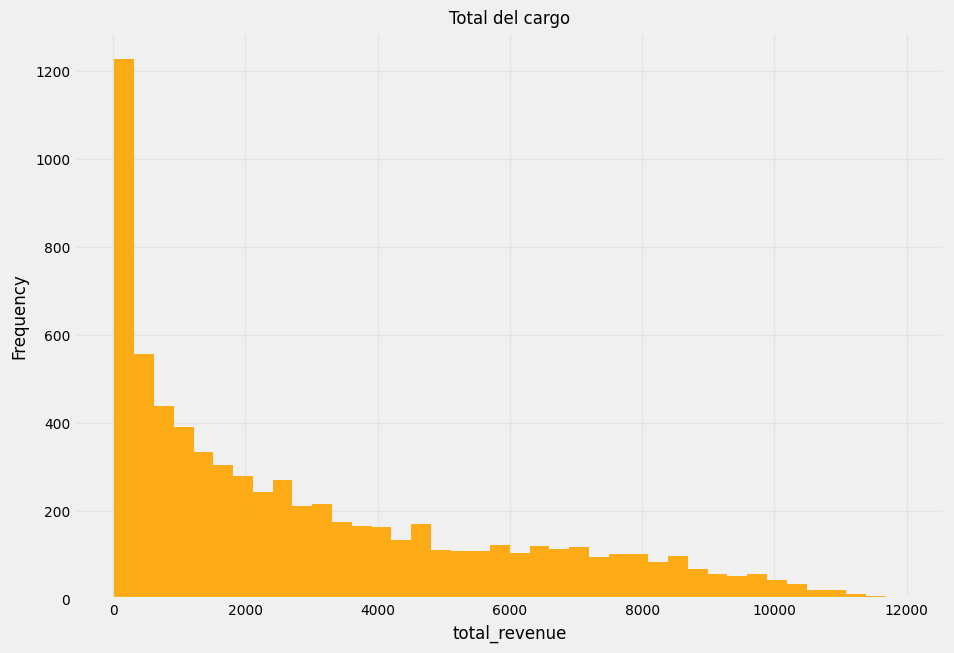

La distribución es platicúrtica con una curtosis de -0.2. Los datos se encuentran dispersos.
La distribución se encuentra sesgada hacia la izquierda 0.92.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
total_revenue,7043.0,3034.379056,2108.64,24.8,2865.2,21.36,605.61,2108.64,4801.145,11979.34,-0.2,0.92


In [26]:
categorical_analyzer.plot_distribution(title= 'Total del cargo', column_name='total_revenue', cant_bins = 40, color='orange', rotation=0, alpha=0.9)

- **Descripción** : Total de ingresos generados por cada cliente hasta la fecha. Se calcula como la suma de:

Total Charges: Pagos acumulados por los servicios contratados.
Total Extra Data Charges: Cargos adicionales por exceder el límite de datos.
Total Long Distance Charges: Cargos adicionales por llamadas de larga distancia.

- Disponemos de un rango mayor entre 21 y 4802 dólares lo que nos da un total de lo generado de nuestros servicios en base a un conjunto de variables.